In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16 
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [ ]:
dj = dijet.DIJET(3, constrained_moments=True)
dj.load_params('replica_params_pp.csv')
dj.set_params(3)

points = 7
lumi = 100
roots = 55

pT_values = np.linspace(0.5, 10, 50)

space = {
    'y' : [0.5, 0.95],
    'z' : [0.2, 0.5],
    'min Q2' : 5,
    't' : [0.01, 0.04],
    # 'max Q2' : 30
}

data = {}
for weight in ['den', '1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']:
    data[weight] = []
    
for pT in pT_values:

    den = dj.integrated_denominator_approx(pT, roots**2, space, points=points)
    data['den'].append(den)
    
    for weight in ['1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']:

        num = dj.integrated_numerator_approx(pT, roots**2, space, weight=weight, points=points)
        data[weight].append(num)

for weight in data:
    data[weight] = np.array(data[weight])


Using constrained moment parameters


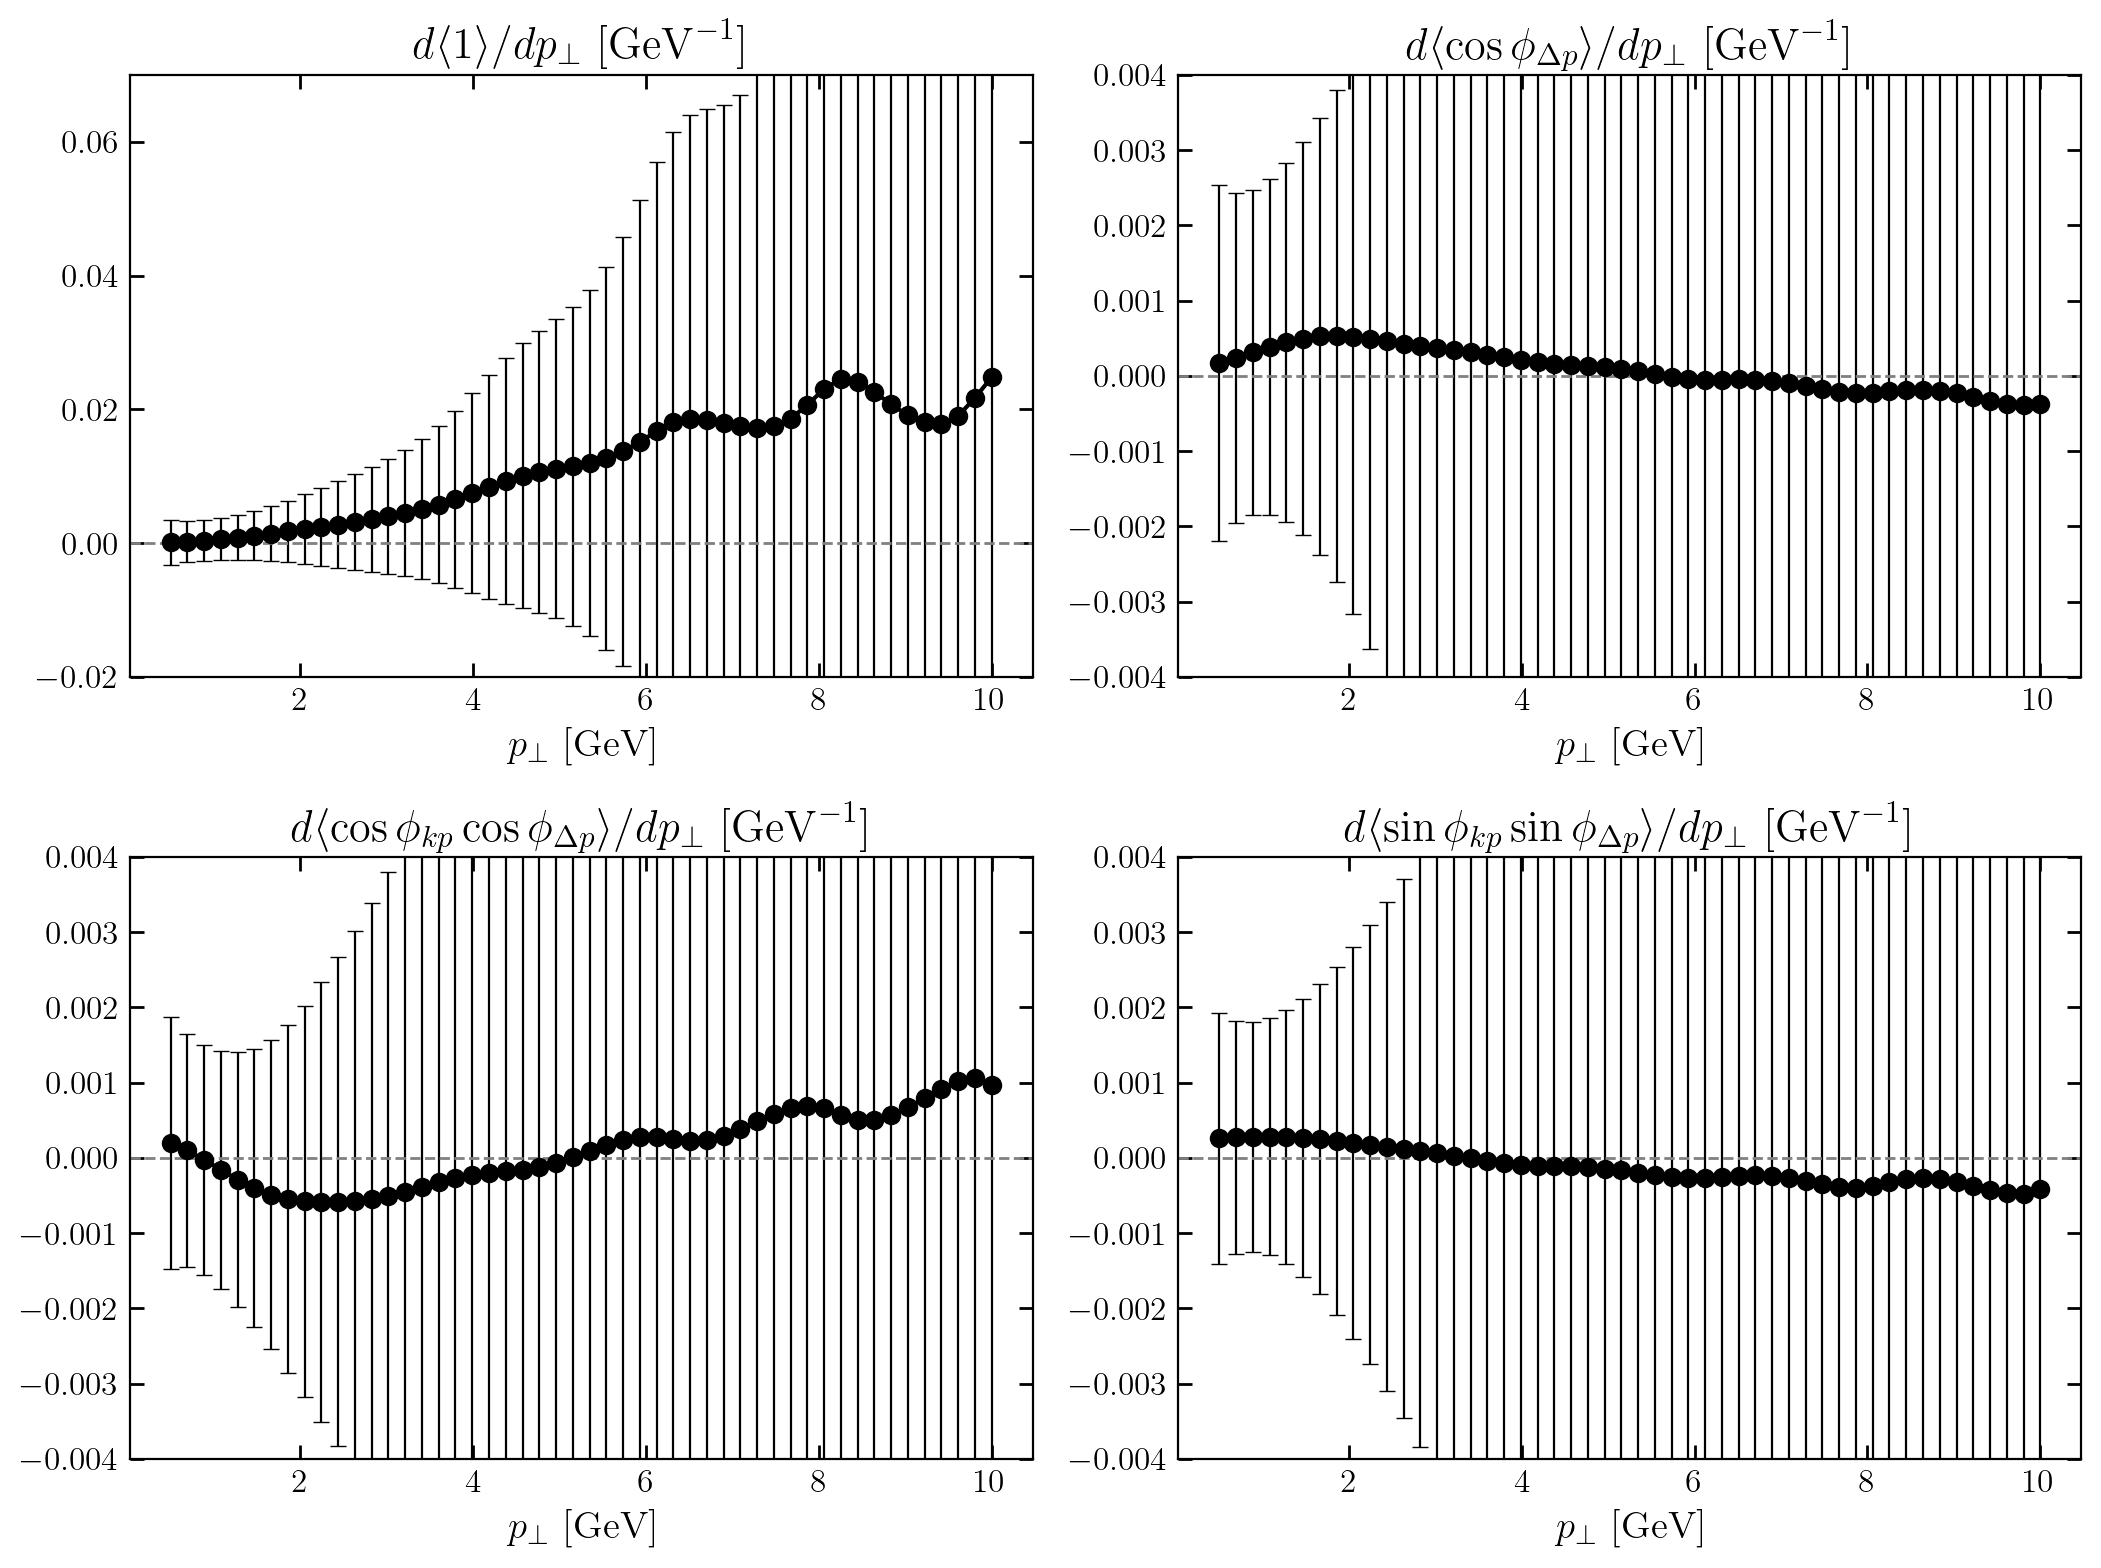

In [49]:

asp_ratio = 4/3
psize = 4
fig, axs = plt.subplots(2, 2, figsize=(asp_ratio*psize*2, psize*2))

all = np.array(data['1'])/np.array(data['den'])
cos_corr = np.array(data['cos(phi_Dp)'])/np.array(data['den'])
coscos_corr = np.array(data['cos(phi_kp)cos(phi_Dp)'])/np.array(data['den'])
sinsin_corr = np.array(data['sin(phi_kp)sin(phi_Dp)'])/np.array(data['den'])

all_error = np.sqrt(1/(data['den']*lumi))
cos_error = np.sqrt(0.5/(data['den']*lumi))
coscos_error = np.sqrt(0.25/(data['den']*lumi))
sinsin_error = np.sqrt(0.25/(data['den']*lumi))

axs[0,0].errorbar(
    pT_values, all, yerr=all_error, marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)

axs[0,1].errorbar(
    pT_values, cos_corr, yerr=cos_error, marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)

axs[1,0].errorbar(
    pT_values, coscos_corr, yerr=coscos_error, marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)

axs[1,1].errorbar(
    pT_values, sinsin_corr, yerr=sinsin_error, marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)


axs[0,0].set_ylim([-0.02, 0.07])
axs[1,0].set_ylim([-0.004, 0.004])
axs[0,1].set_ylim([-0.004, 0.004])
axs[1,1].set_ylim([-0.004, 0.004])

for ax in axs:
    for iax in ax:
        iax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        iax.set_xlabel(r'$p_{\perp}$ [GeV]')
        iax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        iax.axhline(y=0, color='gray', linestyle='--', linewidth=1)


axs[0,0].set_title(fr'$d \langle 1 \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
axs[0,1].set_title(fr'$d \langle \cos \phi_{{\Delta p}} \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
axs[1,0].set_title(fr'$d \langle \cos \phi_{{k p}} \cos \phi_{{\Delta p}}  \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
axs[1,1].set_title(fr'$d \langle \sin \phi_{{k p}} \sin \phi_{{\Delta p}}  \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')

plt.tight_layout()
plt.show()

# if plot_bands:
#     fig.savefig('plots/dsa_band.pdf', dpi=400, bbox_inches="tight")
# else:
#     fig.savefig('plots/dsa_lines.pdf', dpi=400, bbox_inches="tight")

